# 15 Use some function for regularization of dataset based on problem 14

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/content/student.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
data.head()

,Hours_studied,Hours_slept,Result
0,7.329712,7.848625,0
1,14.649273,10.545618,1
2,3.431501,6.127123,0
3,5.888299,6.204252,0
4,3.680169,6.072624,0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_train),len(y_train),  len(X_test), len(y_test))

40 40 10 10


In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def cost_function(X, y, theta):
  
    m = len(y)
    
    # hypothesis
    h = sigmoid(X.dot(theta))

    # cost
    J = (1 / m) * np.sum((-y * np.log(h)) - ((1 - y) * np.log(1 - h)))

    return J

In [7]:

# logistic regression with L1 regularization
def logistic_regression_L1(X, y, theta, alpha, iterations, l1):

        m = len(y)    
        # cost history
        J_history = np.zeros((iterations, 1))
    
        for i in range(iterations):
    
            # hypothesis
            h = sigmoid(X.dot(theta))
    
            # gradient
            theta = theta - (alpha / m) * (X.T.dot(h - y)) + (l1 / m) * np.sign(theta)
    
            # cost
            J_history[i] = cost_function(X, y, theta)
    
        return (J_history, theta)

In [13]:
def predict(X, theta):
    
        # hypothesis
        h = sigmoid(X.dot(theta))
    
        # convert probabilities to 0 or 1
        h[h >= 0.5] = 1
        h[h < 0.5] = 0
    
        return h

In [9]:
alpha = 0.01
theta = np.zeros((X_train.shape[1], 1))
iterations = 10000
# regularization parameter
l1 = 0.1
print('Initial cost is: ', cost_function(X_train, y_train, theta))

Initial cost is:  0.6931471805599454


In [10]:
J_history, theta_optimized = logistic_regression_L1(X_train, y_train, theta, alpha, iterations, l1)
print('Optimized cost is: ', J_history[-1])
print('Optimized parameters are: ', theta_optimized)

Optimized cost is:  [0.32018745]
Optimized parameters are:  [[-27.89570423]
 [  1.31819399]
 [  1.87622135]]


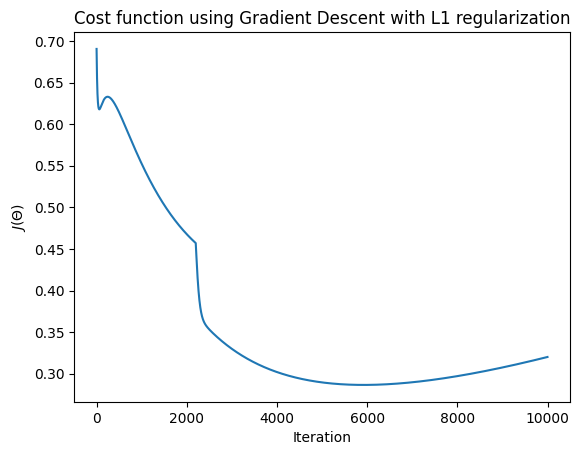

In [11]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent with L1 regularization')
plt.show()

In [14]:
y_pred = predict(X_test, theta_optimized)
print('Accuracy: {} %'.format(100 * np.sum(y_pred == y_test) / len(y_test)))

Accuracy: 100.0 %
